In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob
import numpy as np

### 1. Cross-Validation

In [4]:
report_files = glob.glob('report_files/cross_validation_report_base*.json')
highest_timestamp_file = max(report_files, key=lambda x: x[-16:-5])

# Load the data from the selected file
with open(highest_timestamp_file, 'r') as file:
    data = json.load(file)

print(f"Loaded data from file: {highest_timestamp_file}")

Loaded data from file: report_files/cross_validation_report_base_08222107.json


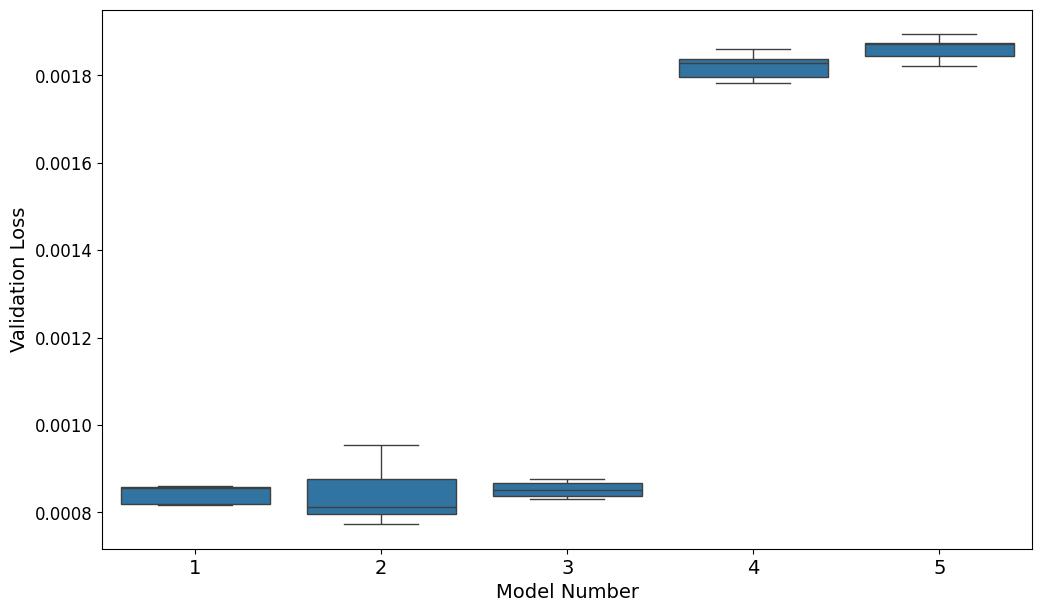

In [7]:
df = pd.DataFrame([
    {
        'model': model.split('], ')[0].replace('architecture=', ''),  # Extract only the architecture part
        'val_loss': loss,
        'mean_val_loss': details['mean_val_loss']
    }
    for model, details in data.items()
    for loss in details['val_losses']
])

# Sort by mean_val_loss
df_sorted = df.sort_values('mean_val_loss')

# Create a mapping of models to numbers
unique_models = df_sorted['model'].unique()
model_mapping = {model: idx + 1 for idx, model in enumerate(unique_models)}

# Replace the model names with numbers in the DataFrame
df_sorted['model'] = df_sorted['model'].map(model_mapping)

plt.figure(figsize=(12, 7))

# Create the boxplot
sns.boxplot(x='model', y='val_loss', data=df_sorted)

plt.xlabel('Model Number', fontsize=14)
plt.ylabel('Validation Loss', fontsize=14)
plt.xticks(fontsize=14)  # Increased font size for x-axis tick labels
plt.yticks(fontsize=12)  # Increased font size for y-axis tick labels

plt.show()

In [10]:
report_files = glob.glob('report_files/cross_validation_report_fine*.json')
highest_timestamp_file = max(report_files, key=lambda x: x[-16:-5])

# Load the data from the selected file
with open(highest_timestamp_file, 'r') as file:
    data_fine = json.load(file)

print(f"Loaded data from file: {highest_timestamp_file}")

Loaded data from file: report_files/cross_validation_report_fine_08231130.json


/var/folders/9g/qxrpq3xx3fzcryv3rjsw2scr0000gn/T/ipykernel_16402/4145645967.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['model'] = df_top['model'].map(model_mapping)


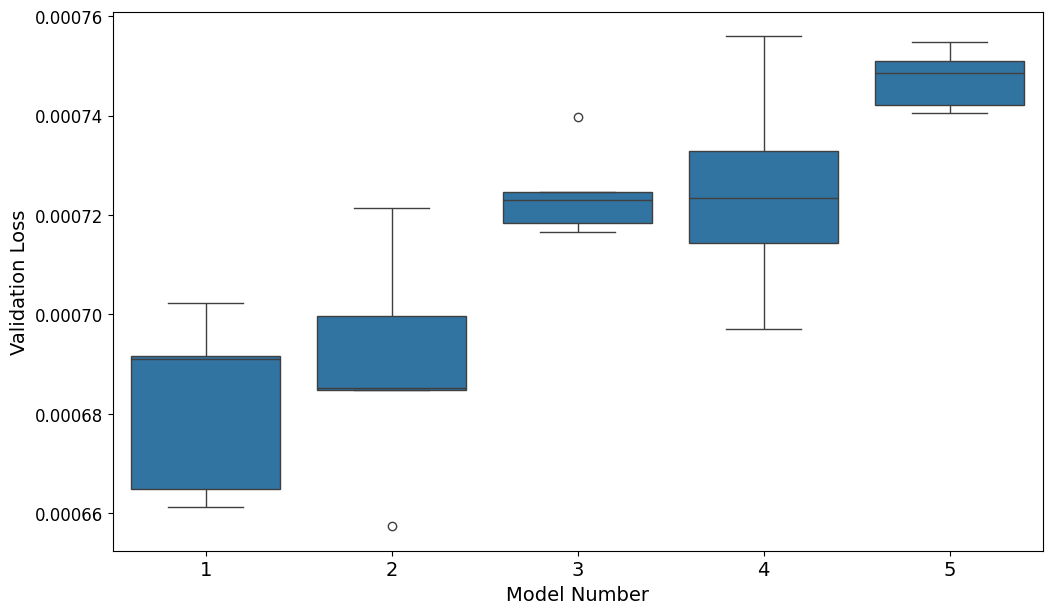

In [11]:
df = pd.DataFrame([
    {
        'model': model.split('], ')[1].replace('optimiser_params=', ''),  # Extract only the architecture part
        'val_loss': loss,
        'mean_val_loss': details['mean_val_loss']
    }
    for model, details in data_fine.items()
    for loss in details['val_losses']
])

df_sorted = df.sort_values('mean_val_loss')

# Get the top five models based on mean_val_loss
top_models = df_sorted['model'].unique()[:5]

# Filter the DataFrame to keep only the top five models
df_top = df_sorted[df_sorted['model'].isin(top_models)]

# Create a mapping of models to numbers (for these top five models)
unique_models = df_top['model'].unique()
model_mapping = {model: idx + 1 for idx, model in enumerate(unique_models)}

# Replace the model names with numbers in the DataFrame
df_top['model'] = df_top['model'].map(model_mapping)

plt.figure(figsize=(12, 7))

# Create the boxplot for the top five models
sns.boxplot(x='model', y='val_loss', data=df_top)

plt.xlabel('Model Number', fontsize=14)
plt.ylabel('Validation Loss', fontsize=14)
plt.xticks(fontsize=14)  # Increased font size for x-axis tick labels
plt.yticks(fontsize=12)  # Increased font size for y-axis tick labels

plt.show()

In [21]:
# Initialize an empty list to store the data for the DataFrame
table_data = []

# Iterate over each entry in the JSON to parse and format it for the DataFrame
for i, (key, value) in enumerate(data.items(), start=1):
    # Extract the architecture and optimiser_params from the key
    architecture_str, optimiser_params_str = key.split('], optimiser_params=')
    architecture_str = architecture_str.replace('architecture=', '')
    optimiser_params_str = optimiser_params_str.strip('{}')
    
    # Convert the optimiser_params string to a dictionary
    optimiser_params = eval("{" + optimiser_params_str + "}")
    
    # Prepare the row data
    row = {
        'combination_id': i,
        'layer_configuration': architecture_str,
        'optimiser': optimiser_params['optimiser'],
        'learning_rate': optimiser_params['learning_rate'],
        'batch_size': optimiser_params['batch_size'],
        'scheduler_params': optimiser_params['scheduler_params'],
        'weight_decay': optimiser_params['weight_decay'],
        'mean_val_loss': value['mean_val_loss'],
        'stdv_val_loss': value['stdv_val_loss']
    }
    
    # Add the row to the table data
    table_data.append(row)

# Create a DataFrame
df = pd.DataFrame(table_data)

# Sort the DataFrame by mean_val_loss
df_sorted = df.sort_values(by='mean_val_loss')

# Display the entire DataFrame
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
pd.set_option('display.max_rows', None)     # Ensure all rows are displayed

# Display the sorted DataFrame
df_sorted

,combination_id,layer_configuration,optimiser,learning_rate,batch_size,scheduler_params,weight_decay,mean_val_loss,stdv_val_loss
1,2,"[{'type': 'bidirectional_lstm', 'units': 19, '...",adadelta,1.0,64,None,0.0001,0.003228,0.000059
0,1,"[{'type': 'bidirectional_lstm', 'units': 20, '...",adadelta,1.0,64,None,0.0001,0.003239,0.000077


### 2. Final Model Trainining

In [5]:
report_files = glob.glob('report_files/final_training_report_*.json')
highest_timestamp_file = max(report_files, key=lambda x: x[-16:-5])

# Load the data from the selected file
with open(highest_timestamp_file, 'r') as file:
    data = json.load(file)

print(f"Loaded data from file: {highest_timestamp_file}")

Loaded data from file: report_files/final_training_report_08242130.json


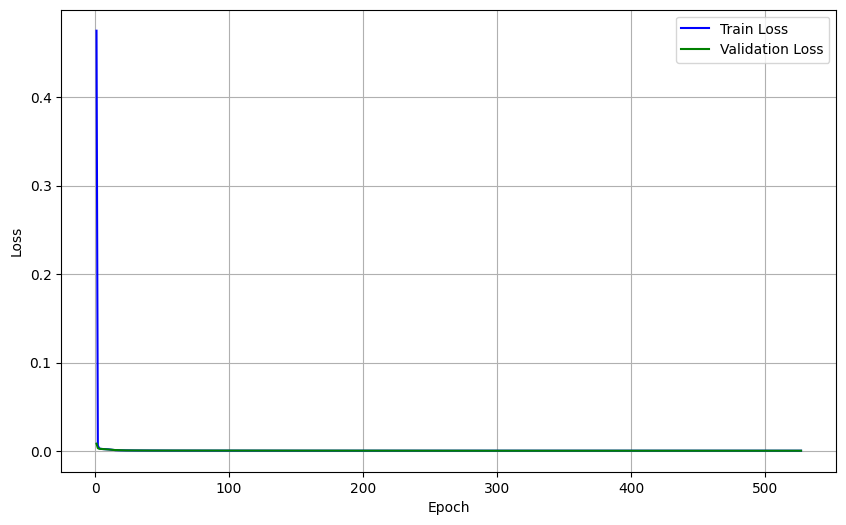

In [6]:
train_losses = data['train_losses_epoch']
val_losses = data['val_losses']
epochs = list(range(1, len(train_losses) + 1))

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, linestyle='-', color='blue', label='Train Loss')
plt.plot(epochs, val_losses, linestyle='-', color='green', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [13]:
with open('report_files/inference_results.json', 'r') as file:
    inferences = json.load(file)

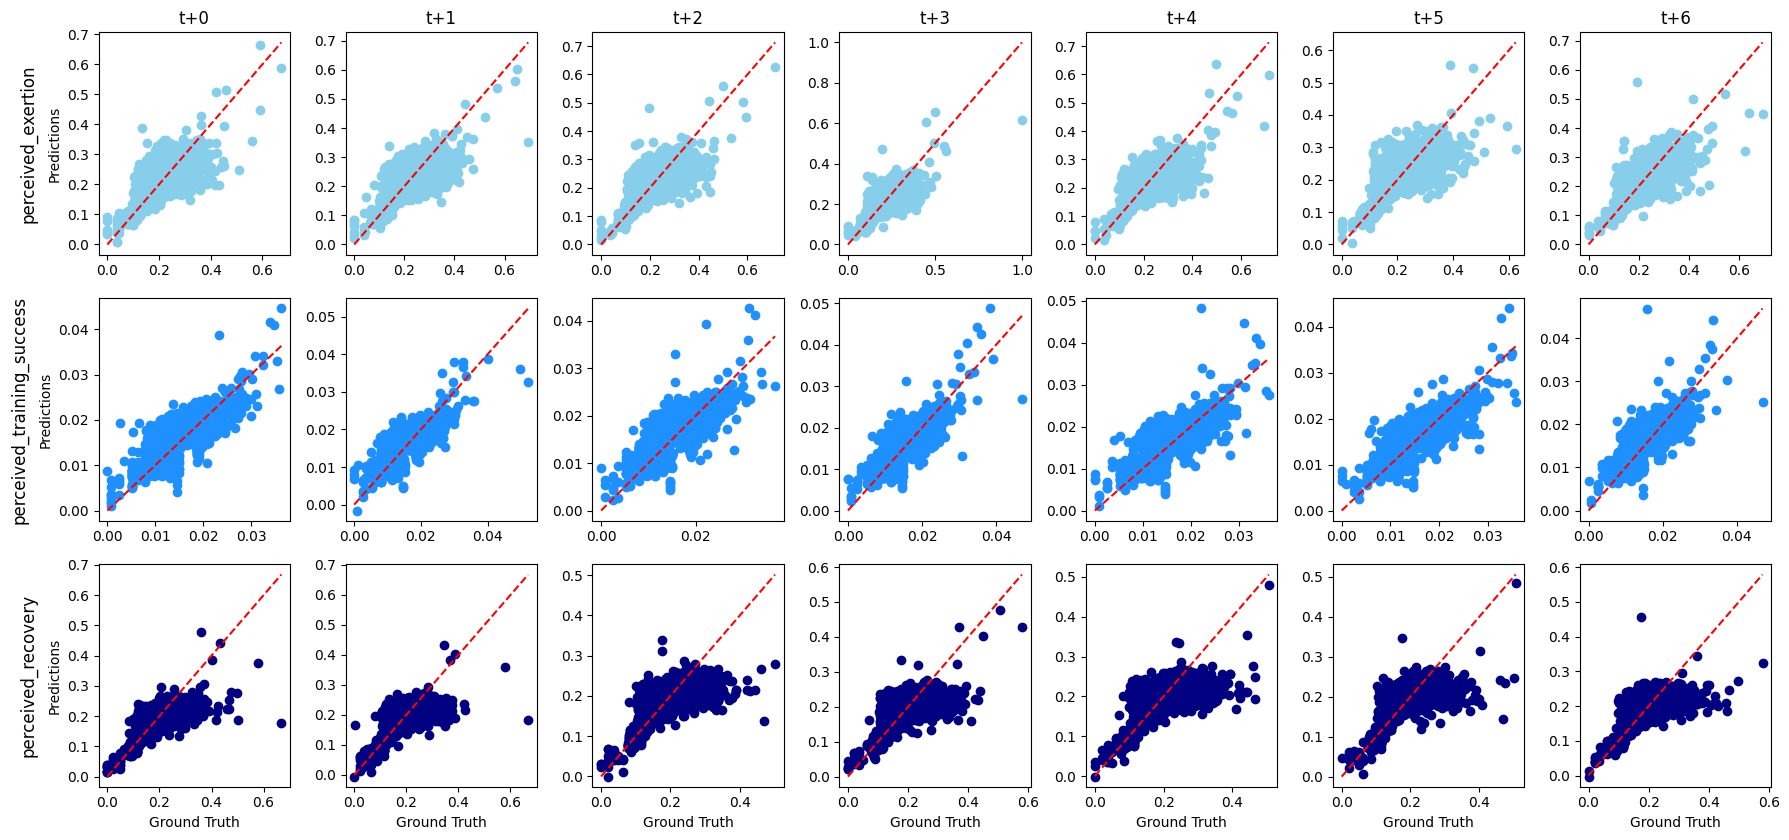

In [15]:
# Convert predictions and ground truth to numpy arrays
predictions = np.array(inferences['predictions'])  # shape: (batch, 7 days, 3 vars)
ground_truth = np.array(inferences['ground_truth'])  # shape: (batch, 7 days, 3 vars)

# Define colors for the variables
colors = ['skyblue', 'dodgerblue', 'navy']

# Define labels for each variable (row)
row_labels = ['perceived_exertion', 'perceived_training_success', 'perceived_recovery', ]

plt.figure(figsize=(20, 10))

# Loop through the variables and days
for i in range(3):  # Loop through the 3 variables
    for j in range(7):  # Loop through the 7 days
        ax = plt.subplot(3, 7, i * 7 + j + 1)
        ground_truth_day_var = ground_truth[:, j, i]
        predictions_day_var = predictions[:, j, i]
        plt.scatter(ground_truth_day_var, predictions_day_var, color=colors[i], label=f'Variable {i + 1}')
        plt.plot([min(ground_truth_day_var), max(ground_truth_day_var)], 
                 [min(ground_truth_day_var), max(ground_truth_day_var)], 
                 'r--')
        if i == 0:
            plt.title(f't+{j}')
        if j == 0:
            ax.set_ylabel('Predictions')
            ax.annotate(row_labels[i], xy=(-0.5, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                        xycoords=ax.yaxis.label, textcoords='offset points',
                        size='large', ha='center', va='center', rotation=90)
        if i == 2:
            plt.xlabel('Ground Truth')

plt.tight_layout(rect=[0.1, 0.1, 1, 0.95])  # Adjust layout to make space for the labels
plt.show()